**Background**

In broad terms, Sea State is made up of three components that describe how a sea is affected by the action of wind and weather, whether that has been created by localised events (waves) or by wind that occurred far from where the sea is being measured (swell)



The three components are:



**Significant wave height (Hs)**

As the sea is normally made up of many different types and sizes of waves and swell, a convention is to take an average of the highest 1/3 of the waves present and use that to describe the sea.



**Wave Frequency or Period**

The next part of sea state is wave frequency and is a measure of how long it takes for the peaks of a wave to pass a given point (or the distance between them if using wave length)
This wave frequency is different when being measured by a moving platform (ie a boat) where it becomes an “encounter frequency”. This will vary from the actual frequency taking into account the speed of the vessel and the angle to the waves that it is travelling.



**Wave Direction**

The last part of the Sea State information is the direction that the waves are coming from. In our data, it is a relative (to the boat) direction. By convention if a ship is heading directly into a sea, the direction is given a 180 deg. If the waves are following the boat it is 0 degrees. Waves coming from the right side of a boat are said to be at 90 deg and from the left 270 deg.



**Putting it all together**

A typical sea might be described as having a 3 m South Westerly swell with an 11 second period., with 1.5 metres waves from the North.
You can check this out via marine forecast sites.



**Our data**

Our data has been captured using a 6 axis accelerometer which captures the three translational forces, X, Y and Z and the three rotational forces around each of those.
We have captured data in a wave model basin at a Maritime College where only one wave and period are generated. We have then driven a model boat around in the basin capturing data.


**Plan**

Our plan is to use Machine Learning Algorithms to estimate wave height, Period and relative direction from this data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
df=pd.read_csv('/content/drive/MyDrive/DataForTest (2).csv')
df.head()

,timestamp,date_time,df_time_stamp,calx,caly,calz,calgyrox,calgyroy,calgyroz
0,1669334967,2022-11-2511:09:27.126814,0.000021,0.003736,-0.193393,0.016032,0.026505,0.003688,-0.009217
1,1669334967,2022-11-2511:09:27.147197,0.020407,-0.001064,-0.211293,0.011232,0.030505,0.003488,-0.009317
2,1669334967,2022-11-2511:09:27.164467,0.037675,0.007336,-0.207693,0.006532,0.034905,0.003088,-0.009617
3,1669334967,2022-11-2511:09:27.180512,0.053719,-0.006964,-0.200593,0.008832,0.038305,0.004288,-0.010617
4,1669334967,2022-11-2511:09:27.196491,0.069698,-0.002264,-0.172993,0.022032,0.043005,0.003788,-0.010617


**Exploratory Data Analysis**

In [ ]:
# Checking for the number of missing values in the dataset.
df.isnull().sum()

timestamp        0
date_time        0
df_time_stamp    0
calx             0
caly             0
calz             0
calgyrox         0
calgyroy         0
calgyroz         0
dtype: int64

This data has got no missing values hence it is suitable for further analysis

In [ ]:
# Dropping some columns that may not be of great importance to coming up with the measurements
df=df.drop(['timestamp','date_time'],axis=1)

In [ ]:
# Checking for the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34621 entries, 0 to 34620
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   df_time_stamp  34621 non-null  float64
 1   calx           34621 non-null  float64
 2   caly           34621 non-null  float64
 3   calz           34621 non-null  float64
 4   calgyrox       34621 non-null  float64
 5   calgyroy       34621 non-null  float64
 6   calgyroz       34621 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [ ]:
# A statistical description of the variables important to the dataset
df.describe()

,df_time_stamp,calx,caly,calz,calgyrox,calgyroy,calgyroz
count,34621.000000,3.462100e+04,3.462100e+04,3.462100e+04,3.462100e+04,3.462100e+04,3.462100e+04
mean,340.466412,4.721990e-10,3.134514e-10,-2.550764e-10,1.206782e-10,-4.499003e-10,3.593484e-10
std,196.213763,2.771932e-01,7.158047e-01,4.816412e-01,2.130175e-01,1.306851e-01,1.174642e-01
min,0.000021,-1.151964e+00,-3.713193e+00,-1.880268e+00,-1.123995e+00,-5.027119e-01,-4.095175e-01
25%,171.320010,-6.326421e-02,-1.777926e-01,-9.996801e-02,-4.169526e-02,-2.581192e-02,-6.691746e-02
50%,340.919668,-6.964212e-03,-4.859259e-02,2.683199e-02,-9.530000e-05,1.888079e-03,2.328254e-02
75%,510.155347,5.763579e-02,1.895074e-01,9.503199e-02,4.470474e-02,2.348808e-02,5.158254e-02
max,679.529148,1.286336e+00,3.644707e+00,1.904032e+00,1.109005e+00,5.004881e-01,4.270825e-01


<Axes: >

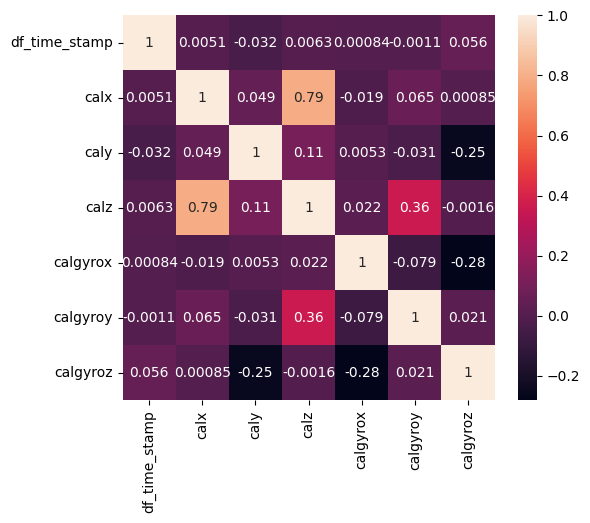

In [ ]:
# Setting up a heatmap to examine the correlation between variables in order to eliminate multicollinearlity
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)

Based on the Pearson correlation coefficient plot shown above, which illustrates the pairwise correlation between all variables in the dataset, it is apparent that the translational forces X and Z are highly correlated. The high correlation between these two variables may result in overfitting when using a machine learning model to predict either of them. Therefore, it is recommended to drop one of the highly correlated variables when predicting the other.

**Fitting a machine learning model to estimate: wave height, Period and relative direction from this data**

In this section, several machine learning models were tested to estimate the significant wave height, period, and wave direction from the provided data. The translational force X was used to measure the wave frequency or period, as it is experienced by a moving boat, while the translational force Y can be used to measure the wave direction relative to the boat. Furthermore, the Z translational force can be utilized to measure significant wave height, which represents the average height of the highest one-third of waves present in the sea. Each of these three variables can be estimated by leveraging the available dataset, using appropriate machine learning algorithms.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
def test_regression_algorithms(X, y, scaler=None):
    """
    This function tests various regression algorithms and returns the MAE for each.

    Parameters:
    X (numpy array): Input features
    y (numpy array): Target variable
    scaler (str): 'minmax' to use MinMaxScaler, 'standard' to use StandardScaler,
                  or None to not scale the data (default: None)

    Returns:
    mae_dict (dict): A dictionary with the MAE for each algorithm
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data if requested
    if scaler == 'minmax':
        scaler = MinMaxScaler()
    elif scaler == 'standard':
        scaler = StandardScaler()
    else:
        scaler = None
    if scaler is not None:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Define the regression models
    elastic_net_reg = ElasticNet(random_state=42)
    decision_tree_reg = DecisionTreeRegressor(random_state=42)
    random_forest_reg = RandomForestRegressor(random_state=42)
    svr_reg = SVR()
    lightgbm_reg = LGBMRegressor(random_state=42)
    knn_reg = KNeighborsRegressor()
    mlp_reg = MLPRegressor(random_state=42)

    # Train the models on the training set
    elastic_net_reg.fit(X_train, y_train)
    decision_tree_reg.fit(X_train, y_train)
    random_forest_reg.fit(X_train, y_train)
    svr_reg.fit(X_train, y_train)
    lightgbm_reg.fit(X_train, y_train)
    knn_reg.fit(X_train, y_train)
    mlp_reg.fit(X_train, y_train)

    # Make predictions on the testing set
    elastic_net_pred = elastic_net_reg.predict(X_test)
    decision_tree_reg_pred = decision_tree_reg.predict(X_test)
    random_forest_reg_pred = random_forest_reg.predict(X_test)
    svr_reg_pred = svr_reg.predict(X_test)
    lightgbm_reg_pred = lightgbm_reg.predict(X_test)
    knn_reg_pred = knn_reg.predict(X_test)
    mlp_reg_pred = mlp_reg.predict(X_test)

    # Calculate the MAE for each model
    elastic_net_mae = mean_absolute_error(y_test, elastic_net_pred)
    decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_pred)
    random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_pred)
    svr_reg_mae = mean_absolute_error(y_test, svr_reg_pred)
    lightgbm_reg_mae = mean_absolute_error(y_test, lightgbm_reg_pred)
    knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)
    mlp_reg_mae = mean_absolute_error(y_test, mlp_reg_pred)

    # Store the MAE values in a dictionary
    mae_dict = {
        "Elastic Net Regression": elastic_net_mae,
        "Decision Tree Regression": decision_tree_reg_mae,
        "Random Forest Regression": random_forest_reg_mae,
        "SVR": svr_reg_mae,
        "LightGBM Regression": lightgbm_reg_mae,
        "KNN Regression": knn_reg_mae,
        "MLP Regression": mlp_reg_mae
    }

    return mae_dict


Testing various machine learning algorithms for regressioon by having each of the translational forces as a dependent variable is a suitable way of estimating them by using regression.

**Estimation of Wave Frequency or Period**

In this section, the function test_regression_algorithms is used to evaluate various machine learning algorithms for predicting the translational force X, which corresponds to the wave frequency or period. The goal is to determine the most suitable machine learning algorithm that exhibits the least Mean Absolute Error in predicting the wave frequency.

In [ ]:
# Dropping the calz variable because it is highly correlated to calx to avoid overfitting
test_regression_algorithms(df.drop(['calx','calz'],axis=1).values, df['calx'].values, scaler='minmax')

{'Elastic Net Regression': 0.1609863877383537,
 'Decision Tree Regression': 0.049895350180505414,
 'Random Forest Regression': 0.04157420678700361,
 'SVR': 0.14585928438800352,
 'LightGBM Regression': 0.10156396571134217,
 'KNN Regression': 0.08480769675090254,
 'MLP Regression': 0.15812142521932848}

In [ ]:
test_regression_algorithms(df.drop(['calx','calz'],axis=1).values,df['calx'].values, scaler='standard')

{'Elastic Net Regression': 0.1609863877383537,
 'Decision Tree Regression': 0.049892115523465695,
 'Random Forest Regression': 0.041584789025270755,
 'SVR': 0.14243989905971158,
 'LightGBM Regression': 0.10180053505463807,
 'KNN Regression': 0.08896149602888087,
 'MLP Regression': 0.1444787371045265}

In [ ]:
test_regression_algorithms(df.drop(['calx', 'calz'], axis=1).values, df['calx'].values)


{'Elastic Net Regression': 0.1609863877383537,
 'Decision Tree Regression': 0.04983594223826715,
 'Random Forest Regression': 0.04158247422382671,
 'SVR': 0.16215653590473686,
 'LightGBM Regression': 0.10023153924671599,
 'KNN Regression': 0.022308592057761735,
 'MLP Regression': 0.16090568139855183}

Based on the evaluation results obtained using the test_regression_algorithms function, the KNN regression algorithm was found to be the most suitable for predicting the wave frequency or period, with a Mean Absolute Error of 0.022308592057761735. Therefore, this algorithm will be used to estimate the wave frequency in further analyses.

**Estimation of the Wave Direction**

The objective of this section is to evaluate different machine learning algorithms for predicting the wave direction based on the translational force y, using the test_regression_algorithms function. The primary goal is to identify the algorithm that demonstrates the least Mean Absolute Error in predicting the wave direction, thereby determining the most suitable algorithm for this task.

In [ ]:
test_regression_algorithms(df.drop('caly',axis=1).values,df['caly'].values)

{'Elastic Net Regression': 0.41854478546443097,
 'Decision Tree Regression': 0.10160183393501805,
 'Random Forest Regression': 0.09361769530685919,
 'SVR': 0.4148409721667622,
 'LightGBM Regression': 0.22494723616077586,
 'KNN Regression': 0.03444467581227437,
 'MLP Regression': 0.5816501109815007}

In [ ]:
test_regression_algorithms(df.drop(['caly'],axis=1).values,df['caly'].values,scaler='minmax')

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Elastic Net Regression': 0.42071051585913694,
 'Decision Tree Regression': 0.10163913357400722,
 'Random Forest Regression': 0.09361586902527075,
 'SVR': 0.2997734209938529,
 'LightGBM Regression': 0.22362383513214237,
 'KNN Regression': 0.12440729241877256,
 'MLP Regression': 0.34558592764668095}

In [ ]:
test_regression_algorithms(df.drop(['caly'],axis=1).values,df['caly'].values,scaler='standard')

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Elastic Net Regression': 0.42071051585913694,
 'Decision Tree Regression': 0.10140879422382672,
 'Random Forest Regression': 0.09362147465703971,
 'SVR': 0.2884177572161746,
 'LightGBM Regression': 0.22323338734225465,
 'KNN Regression': 0.14191267003610109,
 'MLP Regression': 0.29624589117223404}

After conducting evaluations using the test_regression_algorithms function, it was determined that the KNN regression algorithm is the most appropriate for predicting the wave direction. The algorithm exhibited the lowest Mean Absolute Error, which was measured at 0.03444467581227437. As a result, this algorithm will be utilized for further analyses related to estimating the wave direction.

**Estimation of Significant wave height (Hs)**




The purpose of this section is to assess a range of machine learning algorithms that can predict the significant wave height (HS) based on the translational force y, using the test_regression_algorithms function. The main aim is to find the algorithm that has the lowest Mean Absolute Error in predicting the wave direction. By doing so, we can determine the most appropriate algorithm to use for this task.

In [ ]:
test_regression_algorithms(df.drop(['calx','calz'],axis=1).values,df['calz'].values,scaler='minmax')

{'Elastic Net Regression': 0.29156758617074086,
 'Decision Tree Regression': 0.08173842599277978,
 'Random Forest Regression': 0.07766593371841156,
 'SVR': 0.2158934319299879,
 'LightGBM Regression': 0.15980981166030675,
 'KNN Regression': 0.11614939205776174,
 'MLP Regression': 0.2507528480037156}

In [ ]:
test_regression_algorithms(df.drop(['calx','calz'],axis=1).values,df['calz'].values,scaler='standard')

{'Elastic Net Regression': 0.29156758617074086,
 'Decision Tree Regression': 0.08172102527075813,
 'Random Forest Regression': 0.07764919898916967,
 'SVR': 0.21259308018051826,
 'LightGBM Regression': 0.15709465246707072,
 'KNN Regression': 0.12347402166064982,
 'MLP Regression': 0.2218843264325281}

In [ ]:
test_regression_algorithms(df.drop(['calx','calz'],axis=1).values,df['calz'].values)

{'Elastic Net Regression': 0.29157670097158794,
 'Decision Tree Regression': 0.08179490252707582,
 'Random Forest Regression': 0.07766301227436824,
 'SVR': 0.2945173751101304,
 'LightGBM Regression': 0.15720911738557983,
 'KNN Regression': 0.0341532678700361,
 'MLP Regression': 0.2883821886406147}

After conducting evaluations using the test_regression_algorithms function, it was determined that the KNN regression algorithm is the most appropriate for predicting the wave height(Hs). The algorithm exhibited the lowest Mean Absolute Error, which was measured at 0.0341532678700361. As a result, this algorithm will be utilized for further analyses related to estimating the wave direction.

**Conclusion**

After testing several machine learning algorithms for estimating wave height, period, and relative direction, the KNN regression algorithm was found to be the most suitable for estimating the three translational forces. To achieve the best estimation results, a function that fits a KNN regression algorithm and tunes the hyperparameters of the KNN regression model is recommended. This approach provides the most convenient way for estimating the three translational forces.

In [ ]:
def fit_knn_algorithm(X, y):
    """
    This function tests the KNN regression algorithm with default parameters and
    MinMaxScaler, and returns the MAE.

    Parameters:
    X (numpy array): Input features
    y (numpy array): Target variable

    Returns:
    knn_reg_mae (float): Mean absolute error of the KNN regressor
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the KNN regressor with default parameters
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X_train, y_train)

    # Make predictions on the testing set
    knn_reg_pred = knn_reg.predict(X_test)

    # Calculate the MAE for the KNN regressor
    knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)

    return knn_reg_mae

In [ ]:
fit_knn_algorithm(df.drop(['calx','calz'],axis=1).values,df['calz'].values)

0.11614939205776174

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

def fit_knn_algorithm(X, y):
    """
    This function tests the KNN regression algorithm with various parameters using
    GridSearchCV, and returns the MAE and the best parameters.

    Parameters:
    X (numpy array): Input features
    y (numpy array): Target variable

    Returns:
    knn_reg_mae (float): Mean absolute error of the KNN regressor with best parameters
    best_params (dict): The best parameters found by GridSearchCV
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline with KNN regressor and without scaling
    pipeline = Pipeline([
        ('knn', KNeighborsRegressor())
    ])

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]
    }

    # Define the GridSearchCV with 10-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=10)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Make predictions on the testing set using the best estimator
    knn_reg_pred = grid_search.best_estimator_.predict(X_test)

    # Calculate the MAE for the KNN regressor with best parameters
    knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)

    # Get the best parameters found by GridSearchCV
    best_params = grid_search.best_params_

    return knn_reg_mae, best_params


In [ ]:
# Fitting the KNN regression algorithm to predict the significant wave height
fit_knn_algorithm(df.drop(['calx','calz'],axis=1).values,df['calz'].values)

(0.024908154442152396,
 {'knn__n_neighbors': 4, 'knn__p': 1, 'knn__weights': 'distance'})

In [ ]:
# Fitting the KNN regression algorithm to predict the wave direction
fit_knn_algorithm(df.drop('caly',axis=1).values,df['caly'].values)

(0.026902932918838687,
 {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'})

In [ ]:
# Fitting the KNN regression algorithm to predict the wave frequency or period
fit_knn_algorithm(df.drop(['calx','calz'],axis=1).values,df['calx'].values)

(0.01813074721533044,
 {'knn__n_neighbors': 4, 'knn__p': 1, 'knn__weights': 'distance'})